In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.utils import resample, shuffle

In [2]:
df = pd.read_csv('data/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
print(df.shape)

(3276, 10)


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [7]:
df = df.dropna()

EDA

<Axes: ylabel='count'>

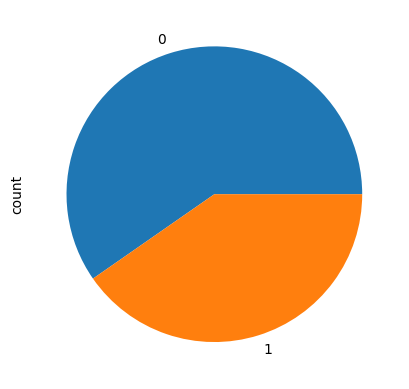

In [10]:
df.Potability.value_counts().plot(kind='pie')

In [11]:
df.Potability.value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

In [12]:
zero = df[df['Potability'] == 0]
one = df[df['Potability'] == 1]

Data Sampling and Model Training

In [14]:
df_minority_unsampled = resample(one, replace=True, n_samples=1200)
df = pd.concat([zero, df_minority_unsampled])
df = shuffle(df)

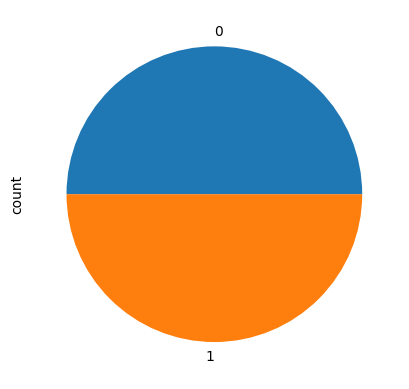

In [16]:
df.Potability.value_counts().plot(kind='pie');
#Pie chart visualization after resampling

#### Correlation

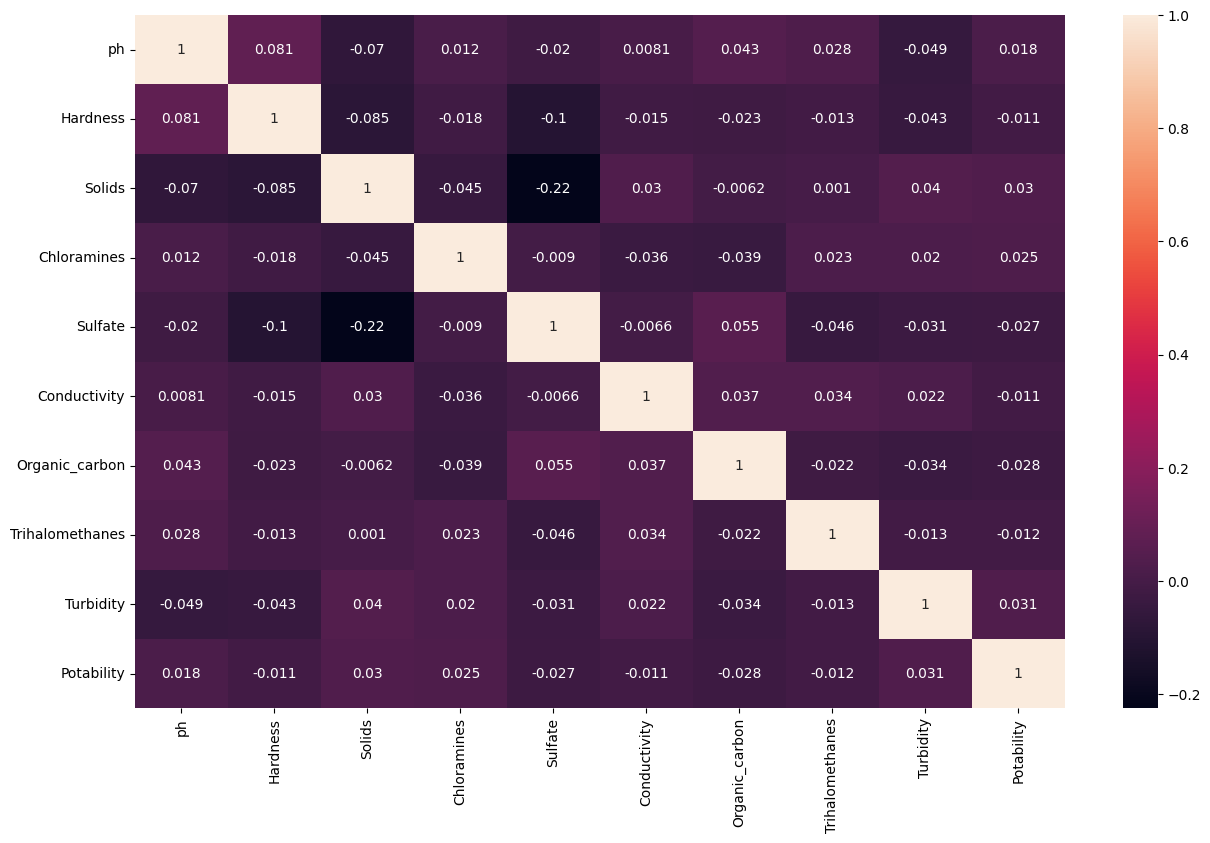

In [18]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True);

In [19]:
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
lr = model.score(X_test, y_test) * 100
print('Accuracy', lr)

Accuracy 51.24999999999999


In [29]:
###GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb = classifier.score(X_test, y_test) * 100
print('Accuracy', nb)

Accuracy 57.08333333333333


In [30]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
dt = modelDT.score(X_test, y_test) * 100
print('Accuracy', dt)

Accuracy 73.33333333333333


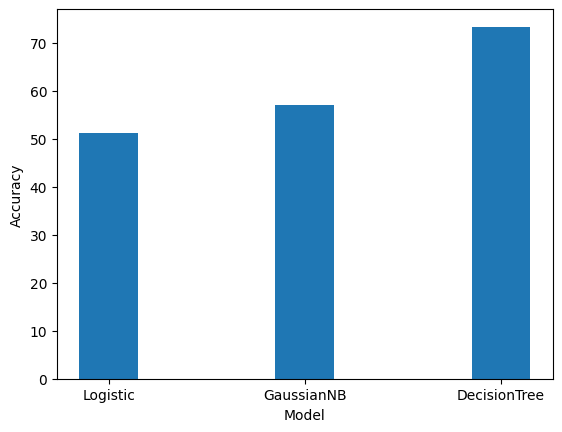

In [32]:
X = ["Logistic", "GaussianNB", "DecisionTree"]
Y = [lr, nb, dt]
plt.bar(X,Y,width=0.3)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show();